##Load The Model

In [6]:
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as be
from tensorflow.keras.preprocessing import image
be.clear_session()
model_path = "./model_inceptionV3.h5"
print("loading the model..")
model = load_model(model_path)
print("Done!")

loading the model..
Done!


##Testing Model

In [1]:
#import dependency
import csv
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from PIL import Image
import tensorflow.keras.backend as be
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
be.clear_session()

In [2]:
img_width, img_height= 299, 299
batch_size=32

test_dir = '/content/drive/MyDrive/Dataset Capstone/test'
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (img_height , img_width),
                                                 batch_size = batch_size,
                                                 class_mode = "categorical")

Found 266 images belonging to 8 classes.


In [3]:
label_food= {'Anggur': 0,
 'Apel': 1,
 'Ayam Goreng': 2,
 'Mangga': 3,
 'Nasi Uduk': 4,
 'Semangka': 5,
 'Soto': 6,
 'Tempe Goreng': 7}

In [4]:
category = {
    0: ['anggur', 'Anggur'],
    1: ['apel', 'Apel'],
    2: ['ayam_goreng', 'Ayam Goreng'],
    3: ['mangga', 'Mangga'],
    4: ['nasi_uduk', 'Nasi Uduk'],
    5: ['semangka', 'Semangka'],
    6: ['soto', 'Soto'],
    7: ['tempe_goreng', 'Tempe Goreng']
}

In [7]:
def predict_image(filename , model):
    img_ = image.load_img(filename , target_size = (299,299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array , axis = 0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)

    predicted_label = category[index][1]

    with open("/content/Nutrisi - Sheet1.csv") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row["Label"] == predicted_label:
                print("Food Name: ", row['Label'])
                print("Vitamin: ", row["Vitamin"])
                print("Carbohydrates: ", row["Karbohidrat"])
                print("Lemak: ", row["Lemak"])
                print("Protein: ", row["Protein"])
                break

call the function to predict the image

1/1 [==============================] - 3s 3s/step
Food Name:  Anggur
Vitamin:  Vitamin B2, Vitamin C
Carbohydrates:  6.8
Lemak:  0.2
Protein:  0.5


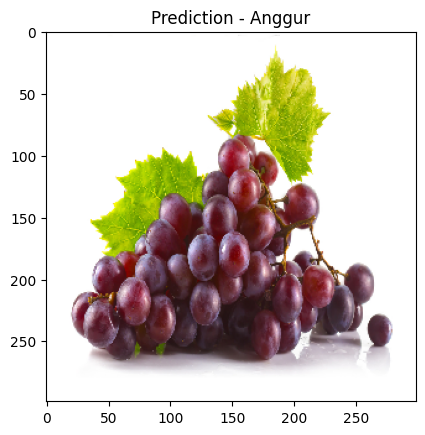

In [8]:
#predict_image(<'path_file'>, model)
predict_image('/content/drive/MyDrive/Dataset Capstone/test/Anggur/Image_1.jpg' , model)

##Testing from other source (outside from test folder)

1/1 [==============================] - 1s 578ms/step
Food Name:  Anggur
Vitamin:  Vitamin B2, Vitamin C
Carbohydrates:  6.8
Lemak:  0.2
Protein:  0.5


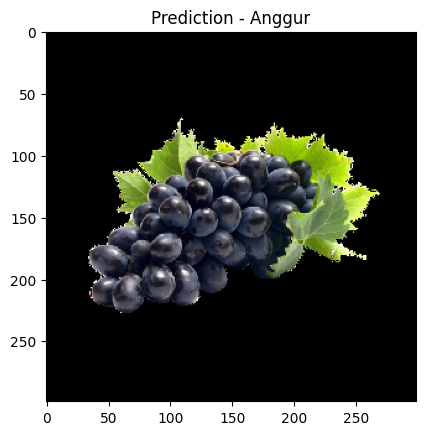

In [10]:
predict_image('/content/anggur.png', model)

1/1 [==============================] - 0s 310ms/step
Food Name:  Tempe Goreng
Vitamin:  Vitamin B1, Vitamin B2, Vitamin B3
Carbohydrates:  7.8
Lemak:  28
Protein:  20


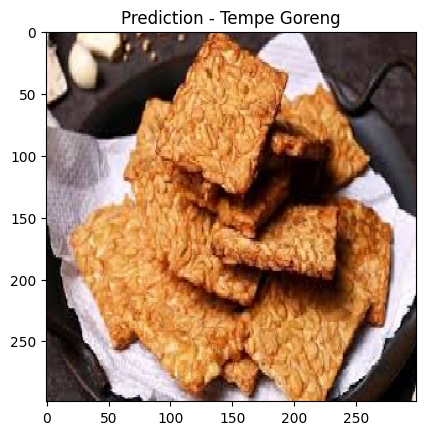

In [11]:
predict_image('/content/tempe.jpg', model)